In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load Data

In [2]:
#load and preprocess the data
df = pd.read_csv("../Datathon/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA

In [3]:
# BMI X SMOKER
# AGE X SMOKER 
# AGE VS CHARGES 

# Model feature:
# Age
# BMI 
# Children
# Sex 
# Smoker
# Region (one-hot encoding)
# BMI x SMOKER -> feature engineer 
# AGE x SMOKER -> feature engineer

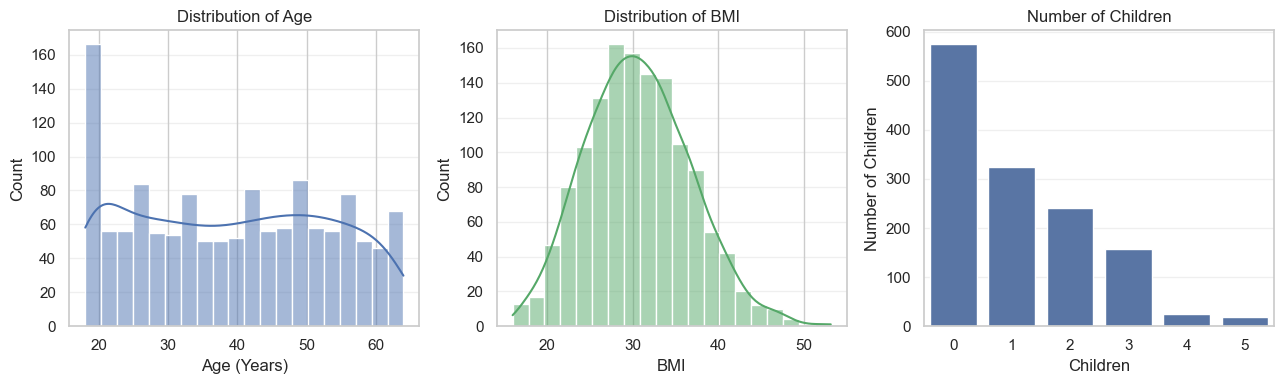

In [4]:
sns.set(style="whitegrid", palette=["#4C72B0", "#003366"])

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

sns.histplot(df['age'], bins=20, kde=True, ax=axes[0], color="#4C72B0")
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel("Age (Years)")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y", alpha=0.3)


sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[1], color="#55A868")
axes[1].set_title("Distribution of BMI")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Count")
axes[1].grid(axis="y", alpha=0.3)

sns.countplot(x='children', data=df, ax=axes[2], color="#4C72B0")
axes[2].set_title("Number of Children")
axes[2].set_xlabel("Children")
axes[2].set_ylabel("Number of Children")
axes[2].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_22282/2048787621.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, ax=axes[1], palette=["#55A868", "#C44E52"])
/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_22282/2048787621.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, ax=axes[2], palette="Set2")


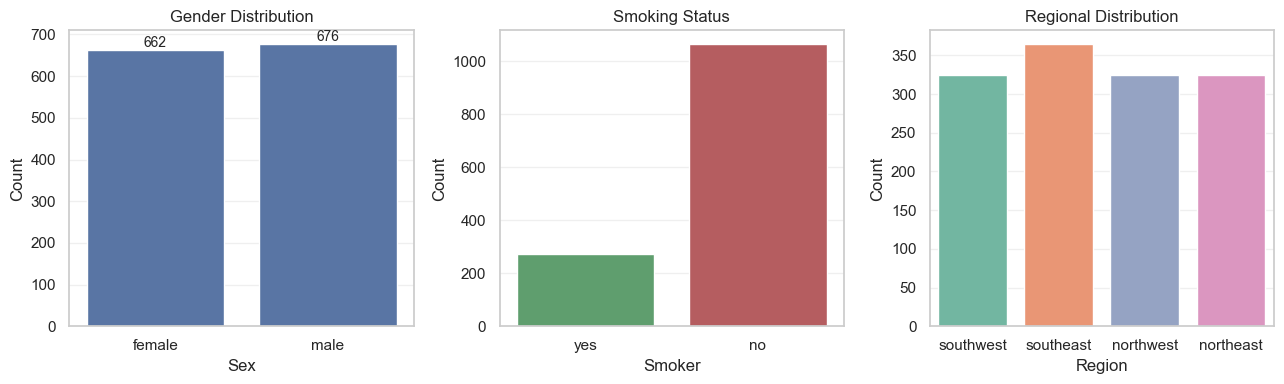

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
sns.set(style="whitegrid")

# Gender
sns.countplot(x='sex', data=df, ax=axes[0], color="#4C72B0")
axes[0].set_title("Gender Distribution")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y", alpha=0.3)

# Add count labels
for p in axes[0].patches:
    axes[0].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, 
    )

# Smoker
sns.countplot(x='smoker', data=df, ax=axes[1], palette=["#55A868", "#C44E52"])
axes[1].set_title("Smoking Status")
axes[1].set_xlabel("Smoker")
axes[1].set_ylabel("Count")
axes[1].grid(axis="y", alpha=0.3)

# Region
sns.countplot(x='region', data=df, ax=axes[2], palette="Set2")
axes[2].set_title("Regional Distribution")
axes[2].set_xlabel("Region")
axes[2].set_ylabel("Count")
axes[2].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

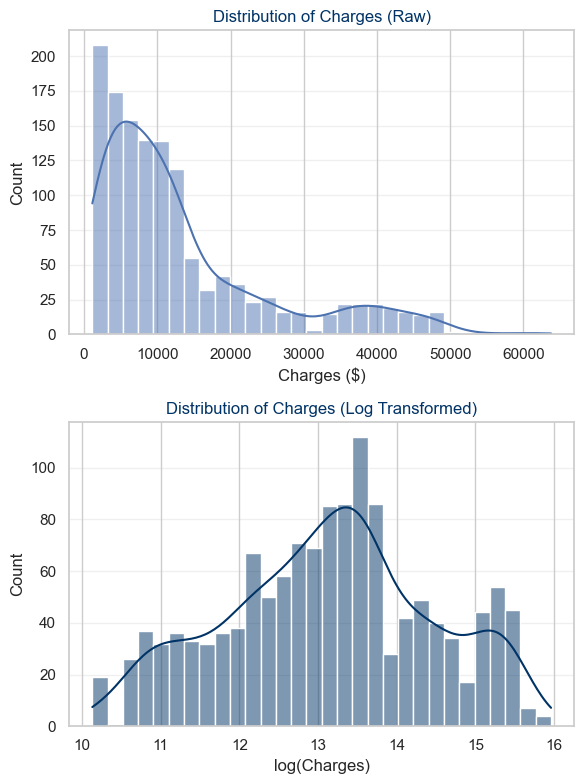

In [6]:
sns.set(style="whitegrid")

# Create a log-transformed version (handle zeros safely)
df["log_charges"] = np.log2(df["charges"])

fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# -------------------------------------
# 1️⃣ Raw (non-log) charges
# -------------------------------------
sns.histplot(df["charges"], bins=30, kde=True, ax=axes[0], color="#4C72B0")
axes[0].set_title("Distribution of Charges (Raw)", fontsize=12, color="#003366")
axes[0].set_xlabel("Charges ($)")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y", alpha=0.3)

# -------------------------------------
# 2️⃣ Log-transformed charges
# -------------------------------------
sns.histplot(df["log_charges"], bins=30, kde=True, ax=axes[1], color="#003366")
axes[1].set_title("Distribution of Charges (Log Transformed)", fontsize=12, color="#003366")
axes[1].set_xlabel("log(Charges)")
axes[1].set_ylabel("Count")
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

## Bivariate

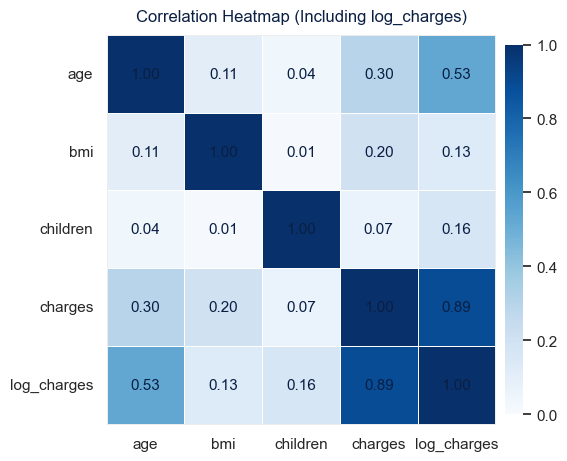

In [7]:
sns.set(style="whitegrid")

# Create log_charges if not yet created
df["log_charges"] = np.log1p(df["charges"])

# Correlation of numeric features (order to match your image)
cols = ["age", "bmi", "children", "charges", "log_charges"]
corr = df[cols].corr()  # Calculate the correlation matrix

plt.figure(figsize=(6, 5))
ax = sns.heatmap(
    corr,
    cmap="Blues",
    vmin=0, vmax=1,                 # same 0–1 scale
    annot=True, fmt=".2f",
    annot_kws={"size": 11, "color": "#0a1f44"},
    linewidths=0.5, linecolor="white",
    square=True,                    # square cells like the screenshot
    cbar=True, cbar_kws={"shrink": 0.9, "pad": 0.02}
)

# Titles & ticks to match the clean style
ax.set_title("Correlation Heatmap (Including log_charges)",
             fontsize=12, color="#0a1f44", pad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va="center", fontsize=11)

# Light frame like in your image
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor("#e6e6e6")

plt.tight_layout()
plt.show()

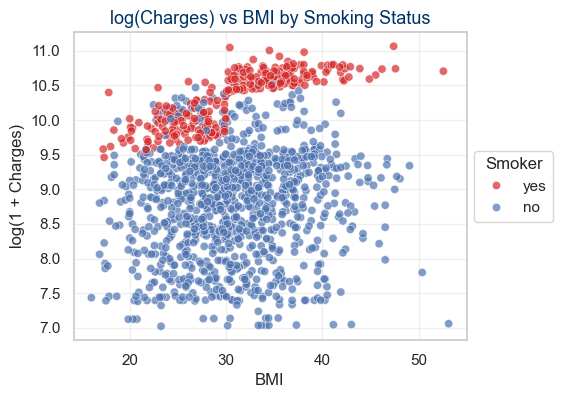

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,4))  # or: fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)

sns.scatterplot(
    data=df, x="bmi", y="log_charges", hue="smoker",
    hue_order=["yes","no"],
    palette={"yes":"#D62728", "no":"#4C72B0"},
    alpha=0.7, ax=ax
)

ax.set_title("log(Charges) vs BMI by Smoking Status", fontsize=13, color="#003366")
ax.set_xlabel("BMI")
ax.set_ylabel("log(1 + Charges)")
ax.grid(alpha=0.3)

# put legend OUTSIDE on the right
leg = ax.legend(
    title="Smoker",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),   # x>1 pushes it outside the right edge
    borderaxespad=0.0,
    frameon=True
)

# leave space on the right so the legend isn’t cut off
plt.subplots_adjust(right=0.78)  # tweak this if needed (0.75–0.85 usually works)

plt.show()


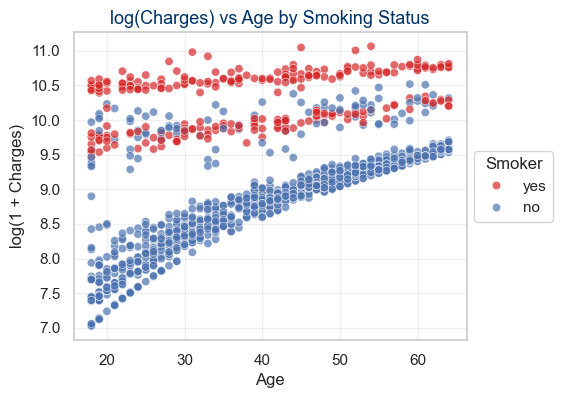

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,4))

sns.scatterplot(
    data=df, x="age", y="log_charges", hue="smoker",
    hue_order=["yes","no"],
    palette={"yes":"#D62728", "no":"#4C72B0"},
    alpha=0.7, ax=ax
)

ax.set_title("log(Charges) vs Age by Smoking Status", fontsize=13, color="#003366")
ax.set_xlabel("Age")
ax.set_ylabel("log(1 + Charges)")
ax.grid(alpha=0.3)

# Legend outside (right side)
ax.legend(
    title="Smoker",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),   # push outside the right edge
    borderaxespad=0.0,
    frameon=True
)

# leave room for the legend
plt.subplots_adjust(right=0.78)

plt.show()


/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_22282/3440916576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


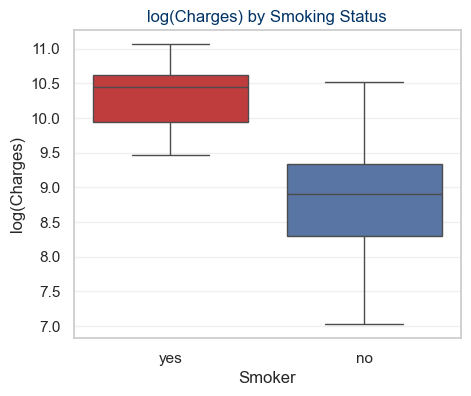

In [10]:
plt.figure(figsize=(5,4))
sns.boxplot(
    x="smoker", y="log_charges", data=df,
    palette=["#D62728", "#4C72B0"]
)
plt.title("log(Charges) by Smoking Status", fontsize=12, color="#003366")
plt.xlabel("Smoker")
plt.ylabel("log(Charges)")
plt.grid(axis="y", alpha=0.3)
plt.show()

/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_22282/1157599312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


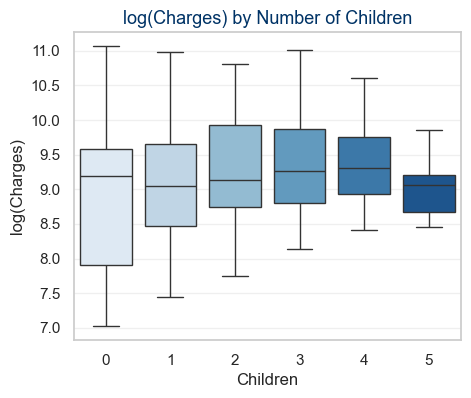

In [11]:
plt.figure(figsize=(5,4))
sns.boxplot(
    x="children", y="log_charges", data=df,
    palette="Blues"
)
plt.title("log(Charges) by Number of Children", fontsize=13, color="#003366")
plt.xlabel("Children")
plt.ylabel("log(Charges)")
plt.grid(axis="y", alpha=0.3)
plt.show()


/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_22282/1539308774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


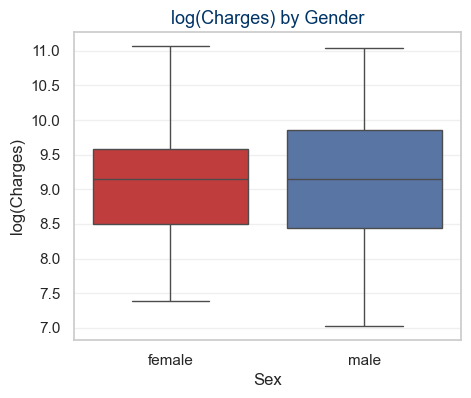

In [12]:
plt.figure(figsize=(5,4))
sns.boxplot(
    x="sex", y="log_charges", data=df,
    palette=["#D62728", "#4C72B0"]
)
plt.title("log(Charges) by Gender", fontsize=13, color="#003366")
plt.xlabel("Sex")
plt.ylabel("log(Charges)")
plt.grid(axis="y", alpha=0.3)
plt.show()

/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_22282/908722162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


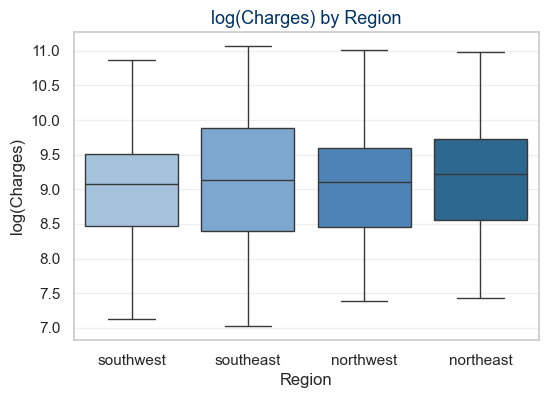

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="region", y="log_charges", data=df,
    palette = ["#9CC3E6", "#6FA8DC", "#3D85C6", "#1C6BA0"]  # light → darker
)
plt.title("log(Charges) by Region", fontsize=13, color="#003366")
plt.xlabel("Region")
plt.ylabel("log(Charges)")
plt.grid(axis="y", alpha=0.3)
plt.show()

In [14]:
df.dtypes

age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64
log_charges    float64
dtype: object

## Data Preprocessing
### 1. Remove Missing Values
### 2. Remove duplicate 
### 3. One-Hot Encoding

In [15]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df = df.copy()

#Remove duplicates and report
n_before = len(df)
df = df.drop_duplicates(keep="first").reset_index(drop=True)
n_after = len(df)
print(f"Removed {n_before - n_after} duplicate row(s). New size: {n_after} rows.")

num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop",
)

# Log-transform charges 
if (df["charges"] <= 0).any():
    raise ValueError("Found non-positive charges; log(charges) undefined. Clean data first.")
y_log = np.log(df["charges"])

print("y_log shape:", y_log.shape)
print("Encoded columns:", list(cat_cols))

Removed 1 duplicate row(s). New size: 1337 rows.
y_log shape: (1337,)
Encoded columns: ['sex', 'smoker', 'region']


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# BayesSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Configuration
RANDOM_STATE = 42
USE_LOG = True
USE_SMEARING = True

target_col = "charges"
num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

# Data
df = df.copy()
df = df.dropna(subset=[target_col] + num_cols + cat_cols)

X = df[num_cols + cat_cols]
y = df[target_col].astype(float)

if USE_LOG:
    y_model = np.log(y)
else:
    y_model = y

X_train, X_test, y_train, y_test, y_raw_train, y_raw_test = train_test_split(
    X, y_model, y, test_size=0.2, random_state=RANDOM_STATE
)

# Preprocessor + Base Estimator
pre = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ],
    remainder="drop",
)

xgb = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",
    random_state=RANDOM_STATE,
)

pipe = Pipeline([("pre", pre), ("model", xgb)])

# Hyperparameter Tuning
search_spaces = {
    "model__learning_rate": Real(1e-3, 0.3, prior="log-uniform"),
    "model__n_estimators":  Integer(200, 1500),
    "model__max_depth":     Integer(3, 12),
    "model__min_child_weight": Integer(1, 12),
    "model__subsample":     Real(0.5, 1.0),
    "model__colsample_bytree": Real(0.5, 1.0),
    "model__gamma":         Real(0.0, 5.0),
    "model__reg_alpha":     Real(1e-4, 10.0, prior="log-uniform"),
    "model__reg_lambda":    Real(1e-4, 10.0, prior="log-uniform"),
}

opt = BayesSearchCV(
    estimator=pipe,
    search_spaces=search_spaces,
    n_iter=50,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
)

# Fit BayesSearchCV
opt.fit(X_train, y_train)

print("Best score (CV RMSE):", -opt.best_score_)
print("Best params:")
best_model = opt.best_estimator_

# Predict and smearing-back transformation
y_pred_test = best_model.predict(X_test)

if USE_LOG:
    if USE_SMEARING:
        y_pred_train = best_model.predict(X_train)  # TRAIN residuals
        resid = y_train - y_pred_train
        S = float(np.mean(np.exp(resid)))
    else:
        S = 1.0

    y_pred_test_orig = S * np.exp(y_pred_test)
    y_test_orig = y_raw_test.values
else:
    y_pred_test_orig = y_pred_test
    y_test_orig = y_test

# Report
rmse = mean_squared_error(y_test_orig, y_pred_test_orig) ** 0.5
r2 = r2_score(y_test_orig, y_pred_test_orig)
mae = mean_absolute_error(y_test_orig, y_pred_test_orig)

print("=== BayesSearchCV XGBoost Results ===")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE:  {mae:,.2f}")
print(f"R^2 : {r2:,.4f}")

# === Metrics table: before vs after smearing (no plots) ===
from sklearn.metrics import mean_absolute_percentage_error

def metrics_table_before_after(fitted, X_test, y_test):
    y_true = np.exp(y_test)  # since y = log(charges)

    rows = []
    for name, obj in fitted.items():
        pipe, c = obj["pipe"], obj["c"]

        # predictions in log space -> raw charges
        y_pred_log    = pipe.predict(X_test)
        y_pred_before = np.exp(y_pred_log)        # without smearing
        y_pred_after  = y_pred_before * c         # with Duan smearing

        def _metrics(yhat):
            return {
                "RMSE": np.sqrt(mean_squared_error(y_true, yhat)),
                "MAE":  mean_absolute_error(y_true, yhat),
                "MAPE": mean_absolute_percentage_error(y_true, yhat) * 100,
                "R2":   r2_score(y_true, yhat),
            }

        m_before = _metrics(y_pred_before)
        m_after  = _metrics(y_pred_after)

        rows.append({
            "Model": name,
            "RMSE_before": m_before["RMSE"],
            "RMSE_after":  m_after["RMSE"],
            "MAE_before":  m_before["MAE"],
            "MAE_after":   m_after["MAE"],
            "MAPE_before": m_before["MAPE"],
            "MAPE_after":  m_after["MAPE"],
            "R2_before":   m_before["R2"],
            "R2_after":    m_after["R2"],
            "Smearing_c":  float(c),
        })

    df_metrics = pd.DataFrame(rows).set_index("Model")
    fmt = df_metrics.copy()
    money_cols = ["RMSE_before","RMSE_after","MAE_before","MAE_after"]
    pct_cols   = ["MAPE_before","MAPE_after"]
    r2_cols    = ["R2_before","R2_after"]

    fmt[money_cols] = fmt[money_cols].round(2)
    fmt[pct_cols]   = fmt[pct_cols].round(4)
    fmt[r2_cols]    = fmt[r2_cols].round(4)
    fmt["Smearing_c"] = fmt["Smearing_c"].round(6)

    fmt = fmt.sort_values(by="RMSE_after", ascending=True)

    print("\n=== Metrics Before vs After Smearing (lower is better for RMSE/MAE/MAPE) ===")
    print(fmt.to_string())
    return df_metrics, fmt  # raw + formatted

# FIX: define the 'fit' dict before calling the function
fit = {
    "XGB (Bayes)": {
        "pipe": best_model,  # the fitted Pipeline
        "c": S               # the smearing factor computed above
    }
}

# Usage
raw_metrics, metrics_pretty = metrics_table_before_after(fit, X_test, y_test)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/grace/Datathon/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


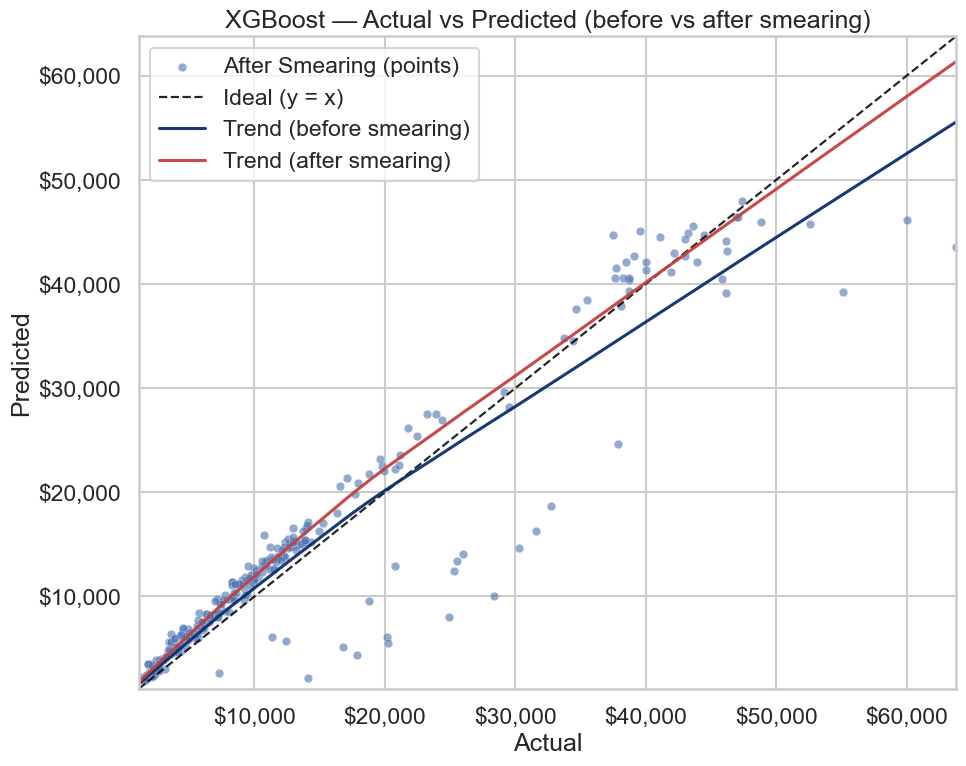

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- build predictions on ORIGINAL scale ---
LOG1P = False  # set True if you trained with np.log1p(y)

if USE_LOG:
    if LOG1P:
        pred_before = np.expm1(y_pred_test)             # no smearing
        pred_after  = S * np.exp(y_pred_test) - 1.0     # with smearing
    else:
        pred_before = np.exp(y_pred_test)               # no smearing
        pred_after  = S * np.exp(y_pred_test)           # with smearing
else:
    pred_before = y_pred_test
    pred_after  = y_pred_test

actual      = np.asarray(y_test_orig, dtype=float).ravel()
pred_before = np.asarray(pred_before, dtype=float).ravel()
pred_after  = np.asarray(pred_after, dtype=float).ravel()

# Sanity check
if not (len(actual) == len(pred_before) == len(pred_after)):
    raise ValueError(f"Length mismatch: actual={len(actual)}, "
                     f"before={len(pred_before)}, after={len(pred_after)}")

# Tidy frames for plotting
df_after  = pd.DataFrame({"Actual": actual, "Predicted": pred_after})
df_before = pd.DataFrame({"Actual": actual, "Predicted": pred_before})

# Metrics (optional; shown for 'after')
rmse = mean_squared_error(actual, pred_after, squared=False)
mae  = mean_absolute_error(actual, pred_after)
r2   = r2_score(actual, pred_after)

# ---- Plot ----
sns.set_theme(style="whitegrid", context="talk")
fmt = FuncFormatter(lambda x, _: f"${x:,.0f}")

fig, ax = plt.subplots(figsize=(10, 8))

# 1) SCATTER: AFTER only (default seaborn color — no palette or color passed)
sns.scatterplot(
    data=df_after, x="Actual", y="Predicted",
    ax=ax, alpha=0.6, s=38, edgecolor="white", linewidth=0.3,
    label="After Smearing (points)"
)

# 2) Identity line
min_lim = float(min(df_after["Actual"].min(), df_after["Predicted"].min(),
                    df_before["Predicted"].min()))
max_lim = float(max(df_after["Actual"].max(), df_after["Predicted"].max(),
                    df_before["Predicted"].max()))
lims = [min_lim, max_lim]
ax.plot(lims, lims, "--", lw=1.6, color="black", alpha=0.85, label="Ideal (y = x)")
ax.set_xlim(lims); ax.set_ylim(lims)

# 3) LOWESS lines (no scatter), with requested colors
sns.regplot(
    data=df_before, x="Actual", y="Predicted",
    scatter=False, lowess=True,
    line_kws={"lw": 2.2, "alpha": 0.95, "color": "#0B2F6B"},
    ax=ax, label="Trend (before smearing)"
)
sns.regplot(
    data=df_after, x="Actual", y="Predicted",
    scatter=False, lowess=True,
    line_kws={"lw": 2.2, "alpha": 0.95, "color": "#C34040"},
    ax=ax, label="Trend (after smearing)"
)

# Styling
ax.set_title("XGBoost — Actual vs Predicted (before vs after smearing)")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.xaxis.set_major_formatter(fmt)
ax.yaxis.set_major_formatter(fmt)
ax.legend(loc="upper left", frameon=True)



plt.tight_layout()
plt.show()


In [35]:
# === Metrics table: before vs after smearing (no plots) ===
from sklearn.metrics import mean_absolute_percentage_error


def metrics_table_before_after(fitted, X_test, y_test):
    y_true = np.exp(y_test)  # since y = log(charges)

    rows = []
    for name, obj in fitted.items():
        pipe, c = obj["pipe"], obj["c"]

        # predictions in log space -> raw charges
        y_pred_log     = pipe.predict(X_test)
        y_pred_before  = np.exp(y_pred_log)          # without smearing
        y_pred_after   = y_pred_before * c           # with Duan smearing

        def _metrics(yhat):
            return {
                "RMSE": np.sqrt(mean_squared_error(y_true, yhat)),
                "MAE":  mean_absolute_error(y_true, yhat),
                "MAPE": mean_absolute_percentage_error(y_true, yhat),
                "R2":   r2_score(y_true, yhat),
            }

        m_before = _metrics(y_pred_before)
        m_after  = _metrics(y_pred_after)

        rows.append({
            "Model": name,
            "RMSE_before": m_before["RMSE"],
            "RMSE_after":  m_after["RMSE"],
            "MAE_before":  m_before["MAE"],
            "MAE_after":   m_after["MAE"],
            "MAPE_before": m_before["MAPE"],
            "MAPE_after":  m_after["MAPE"],
            "R2_before":   m_before["R2"],
            "R2_after":    m_after["R2"],
            "Smearing_c":  float(c),
        })

    df_metrics = pd.DataFrame(rows).set_index("Model")
    # nice formatting (optional)
    fmt = df_metrics.copy()
    money_cols = ["RMSE_before","RMSE_after","MAE_before","MAE_after"]
    pct_cols   = ["MAPE_before","MAPE_after"]
    r2_cols    = ["R2_before","R2_after"]

    fmt[money_cols] = fmt[money_cols].round(2)
    fmt[pct_cols]   = fmt[pct_cols].round(4)
    fmt[r2_cols]    = fmt[r2_cols].round(4)
    fmt["Smearing_c"] = fmt["Smearing_c"].round(6)

    # sort by your preferred criterion (e.g., RMSE_after ascending)
    fmt = fmt.sort_values(by="RMSE_after", ascending=True)

    print("\n=== Metrics Before vs After Smearing (lower is better for RMSE/MAE/MAPE) ===")
    print(fmt.to_string())
    return df_metrics, fmt  # raw + formatted

# Usage:
raw_metrics, metrics_pretty = metrics_table_before_after(fit, X_test, y_test)


=== Metrics Before vs After Smearing (lower is better for RMSE/MAE/MAPE) ===
             RMSE_before  RMSE_after  MAE_before  MAE_after  MAPE_before  MAPE_after  R2_before  R2_after  Smearing_c
Model                                                                                                                
XGB (Bayes)      4643.97     4320.07     2267.82    2681.41       0.1701      0.2508     0.8826    0.8984    1.104291


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    make_scorer, mean_squared_error, mean_absolute_error, r2_score
)

from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Config / columns
RANDOM_STATE = 42
target_col = "charges"
num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

# Data (expects df already loaded)
df = df.copy()
df = df.dropna(subset=[target_col] + num_cols + cat_cols)

X = df[num_cols + cat_cols]
y_raw = df[target_col].astype(float)       # original dollars
y_log = np.log(y_raw)                      # RESPONSE = log(charges)

# One split; keep raw y for later reporting if needed
X_train, X_test, y_train, y_test, y_raw_train, y_raw_test = train_test_split(
    X, y_log, y_raw, test_size=0.2, random_state=RANDOM_STATE
)

# Preprocessing (OHE categoricals)
pre = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ],
    remainder="drop",
)

rf = RandomForestRegressor(
    n_estimators=700,
    bootstrap=True,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

pipe = Pipeline([("pre", pre), ("model", rf)])

# CV + scorer (neg-RMSE on log scale)
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
rmse_scorer = make_scorer(lambda yt, yp: -np.sqrt(mean_squared_error(yt, yp)))

# Bayesian search space
search_spaces = {
    "model__max_depth":          Integer(4, 30),
    "model__min_samples_leaf":   Integer(1, 30),
    "model__min_samples_split":  Integer(2, 50),
    "model__max_features":       Real(0.2, 1.0),              
    "model__ccp_alpha":          Real(1e-6, 1e-3, prior="log-uniform"),
}

opt = BayesSearchCV(
    estimator=pipe,
    search_spaces=search_spaces,
    n_iter=40,                             
    cv=cv,
    scoring=rmse_scorer,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
    refit=True,
)

# --------------------------
# Fit on train (log target)
# --------------------------
opt.fit(X_train, y_train)

print("Best CV RMSE (log-scale):", -opt.best_score_)
print("Best params:")
for k, v in opt.best_params_.items():
    print(f"  {k}: {v}")

best_rf_pipe = opt.best_estimator_

# =========================
# Smearing-aware evaluation
# =========================
# 1) Predictions on LOG scale
y_pred_train_hat = best_rf_pipe.predict(X_train)
y_pred_test_hat  = best_rf_pipe.predict(X_test)

# 2) Duan smearing factor using TRAIN residuals on log scale
resid = (np.asarray(y_train) - np.asarray(y_pred_train_hat)).ravel()
S = float(np.mean(np.exp(resid)))

# 3) Back-transform TEST predictions to original dollars with smearing
y_true = np.asarray(y_raw_test)                 # original dollars
y_pred = S * np.exp(y_pred_test_hat)            # smeared back-transform

# 4) Metrics on original scale
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)  # 0.1234 -> 12.34%
r2   = r2_score(y_true, y_pred)

print(
    f"\n[RandomForest + BayesSearchCV + Smearing] "
    f"Test RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | MAPE: {mape*100:,.2f}% | R²: {r2:.3f} | S: {S:.6f} | MSE: {mse:,.2f}"
)

# --------------------------
# (Optional) also see metrics WITHOUT smearing for comparison
# --------------------------
y_pred_nosmear = np.exp(y_pred_test_hat)
mse_ns = mean_squared_error(y_true, y_pred_nosmear)
rmse_ns = np.sqrt(mean_squared_error(y_true, y_pred_nosmear))
mape_ns = mean_absolute_percentage_error(y_true, y_pred)  # 0.1234 -> 12.34%
mae_ns  = mean_absolute_error(y_true, y_pred_nosmear)
r2_ns   = r2_score(y_true, y_pred_nosmear)
print(
    f"[No Smearing] Test RMSE: {rmse_ns:,.2f} | MAE: {mae_ns:,.2f} | "
    f"MAPE: {mape_ns*100:,.2f}% | R²: {r2_ns:.3f} | MSE:{mse_ns:,.2f}"
)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/grace/Datathon/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


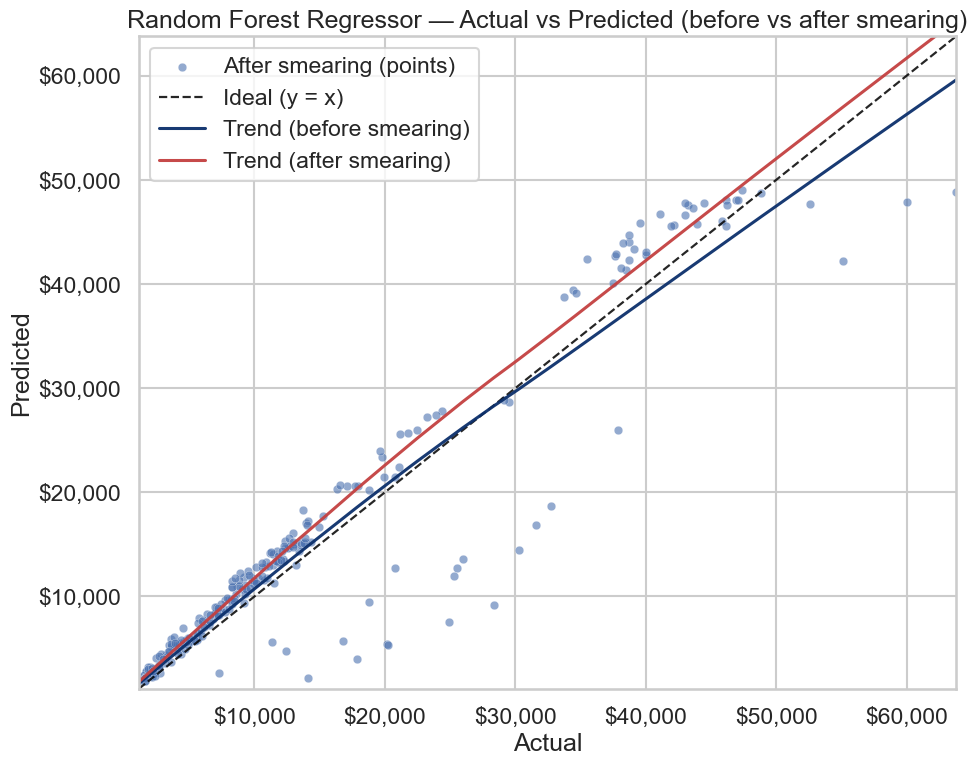

In [39]:
# ========= Random Forest — Actual vs Predicted (before vs after smearing) =========
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- config for transform used during training ---
USE_LOG = True     # RF trained on log(charges)
LOG1P   = False    # set True only if you used np.log1p(y)

# --- get RF predictions on LOG scale ---
y_pred_log = best_rf_pipe.predict(X_test)

# --- build predictions on ORIGINAL scale ---
if USE_LOG:
    if LOG1P:
        pred_before = np.expm1(y_pred_log)          # no smearing
        pred_after  = S * np.exp(y_pred_log) - 1.0   # with smearing
        actual      = np.asarray(np.expm1(y_test), dtype=float).ravel() if 'y_test' in locals() else np.asarray(y_raw_test, dtype=float).ravel()
    else:
        pred_before = np.exp(y_pred_log)             # no smearing
        pred_after  = S * np.exp(y_pred_log)         # with smearing
        actual      = np.asarray(y_raw_test, dtype=float).ravel()
else:
    pred_before = y_pred_log
    pred_after  = y_pred_log
    actual      = np.asarray(y_raw_test, dtype=float).ravel()

pred_before = np.asarray(pred_before, dtype=float).ravel()
pred_after  = np.asarray(pred_after, dtype=float).ravel()

# --- sanity check ---
if not (len(actual) == len(pred_before) == len(pred_after)):
    raise ValueError(f"Length mismatch: actual={len(actual)}, "
                     f"before={len(pred_before)}, after={len(pred_after)}")

# --- tidy frames for plotting ---
df_after  = pd.DataFrame({"Actual": actual, "Predicted": pred_after})
df_before = pd.DataFrame({"Actual": actual, "Predicted": pred_before})

# --- metrics (optional; shown for AFTER) ---
rmse = mean_squared_error(actual, pred_after, squared=False)
mae  = mean_absolute_error(actual, pred_after)
r2   = r2_score(actual, pred_after)

# ---- Plot ----
sns.set_theme(style="whitegrid", context="talk")
fmt = FuncFormatter(lambda x, _: f"${x:,.0f}")

fig, ax = plt.subplots(figsize=(10, 8))

# 1) SCATTER: AFTER only (default seaborn color)
sns.scatterplot(
    data=df_after, x="Actual", y="Predicted",
    ax=ax, alpha=0.6, s=38, edgecolor="white", linewidth=0.3,
    label="After smearing (points)"
)

# 2) Identity line
min_lim = float(min(df_after["Actual"].min(), df_after["Predicted"].min(),
                    df_before["Predicted"].min()))
max_lim = float(max(df_after["Actual"].max(), df_after["Predicted"].max(),
                    df_before["Predicted"].max()))
lims = [min_lim, max_lim]
ax.plot(lims, lims, "--", lw=1.6, color="black", alpha=0.85, label="Ideal (y = x)")
ax.set_xlim(lims); ax.set_ylim(lims)

# 3) LOWESS trends (before/after) with your colors
sns.regplot(
    data=df_before, x="Actual", y="Predicted",
    scatter=False, lowess=True,
    line_kws={"lw": 2.2, "alpha": 0.95, "color": "#0B2F6B"},
    ax=ax, label="Trend (before smearing)"
)
sns.regplot(
    data=df_after, x="Actual", y="Predicted",
    scatter=False, lowess=True,
    line_kws={"lw": 2.2, "alpha": 0.95, "color": "#C34040"},
    ax=ax, label="Trend (after smearing)"
)

# Styling
ax.set_title("Random Forest Regressor — Actual vs Predicted (before vs after smearing)")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.xaxis.set_major_formatter(fmt)
ax.yaxis.set_major_formatter(fmt)
ax.legend(loc="upper left", frameon=True)



plt.tight_layout()
plt.show()



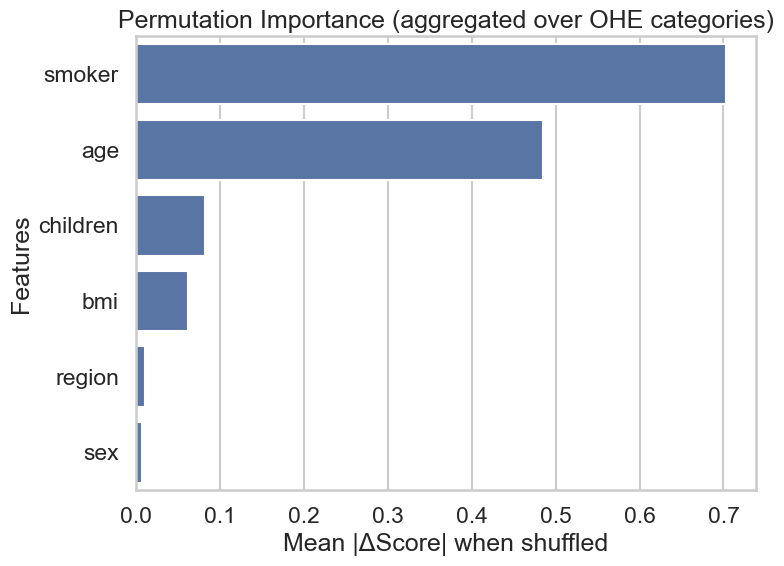

In [19]:
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pre   = best_model.named_steps["pre"]
model = best_model.named_steps["model"]

# Transform X_test to OHE matrix
X_test_trans = pre.transform(X_test)

# Get OHE feature names
feat_names = pre.get_feature_names_out()

# Run permutation on the final model w.r.t. transformed features
perm = permutation_importance(
    model,
    X_test_trans, y_test,
    scoring="neg_root_mean_squared_error",
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
)

perm_mean = pd.Series(perm.importances_mean, index=feat_names)

# aggregate OHE columns back to their base feature
def base_feature(col):
    parts = col.split("__")
    last = parts[-1]
    return last.split("_", 1)[0] if "_" in last else last

base_groups = np.array([base_feature(c) for c in feat_names])
perm_group = (perm_mean.abs()
              .groupby(base_groups).sum()
              .sort_values(ascending=False))

# Plot aggregated top drivers
top = perm_group.head(10).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=top.values, y=top.index)
plt.title("Permutation Importance (aggregated over OHE categories)")
plt.xlabel("Mean |ΔScore| when shuffled")
plt.ylabel("Features")
plt.tight_layout(); plt.show()
